In [74]:
%pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Better plot visuals
sns.set(style="whitegrid")


In [76]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())
print(df.shape)

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [77]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [78]:
df.dtypes



Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [79]:
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [80]:
df['Attrition'].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [81]:
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

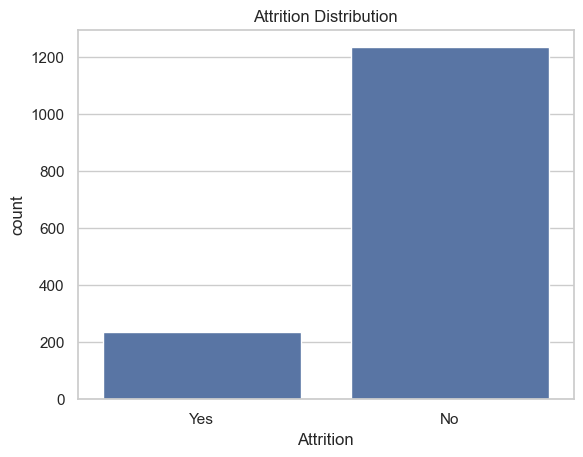

In [82]:
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()


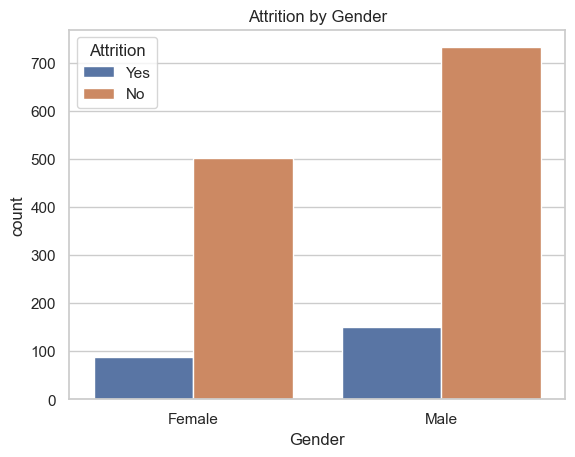

In [83]:
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title("Attrition by Gender")
plt.show()


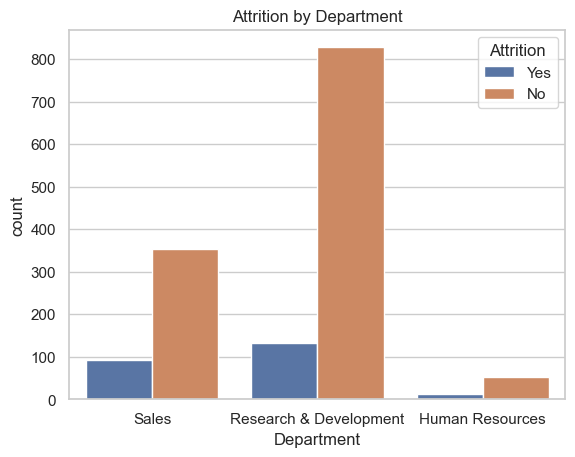

In [84]:
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.show()


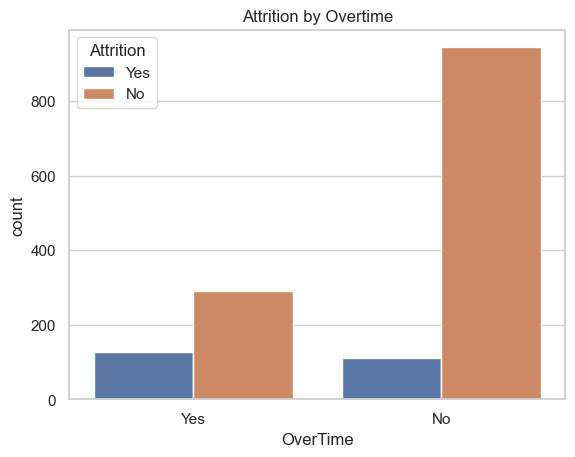

In [85]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition by Overtime")
plt.show()


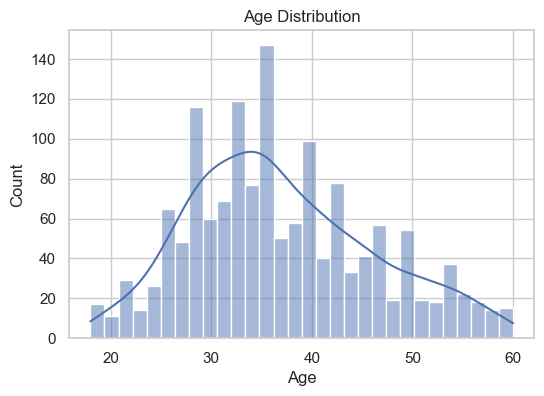

In [86]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


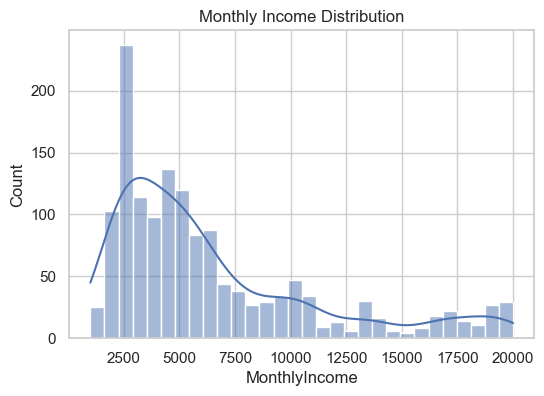

In [87]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyIncome'], bins=30, kde=True)
plt.title("Monthly Income Distribution")
plt.show()


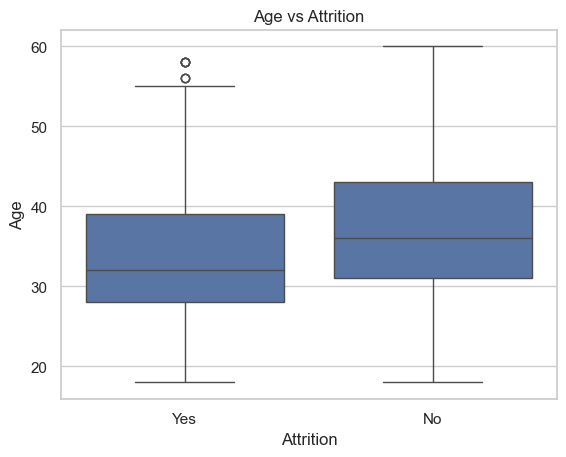

In [88]:
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs Attrition")
plt.show()


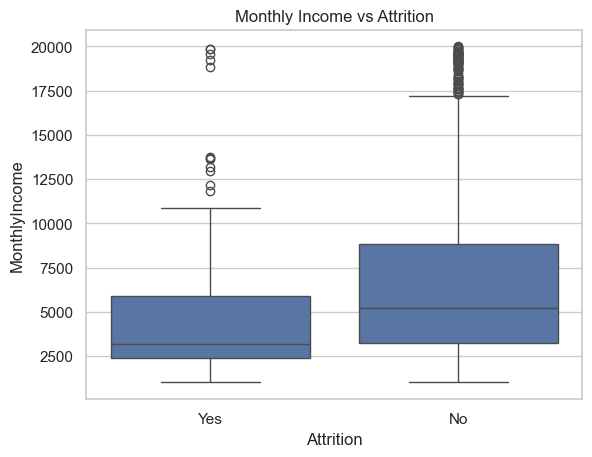

In [89]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income vs Attrition")
plt.show()


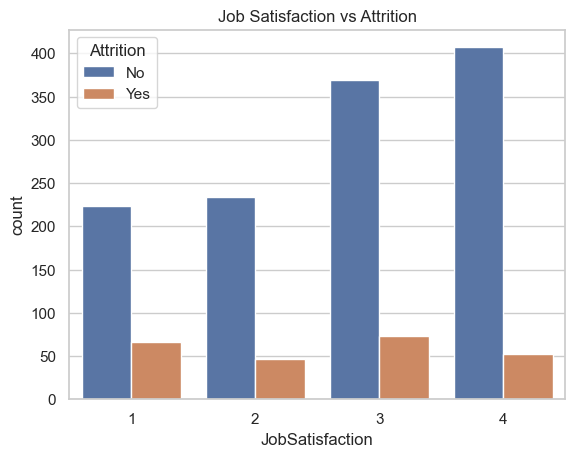

In [90]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title("Job Satisfaction vs Attrition")
plt.show()


In [91]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [92]:
num_cols = df.select_dtypes(include=['int64', 'float64'])


In [93]:
corr = num_cols.corr()


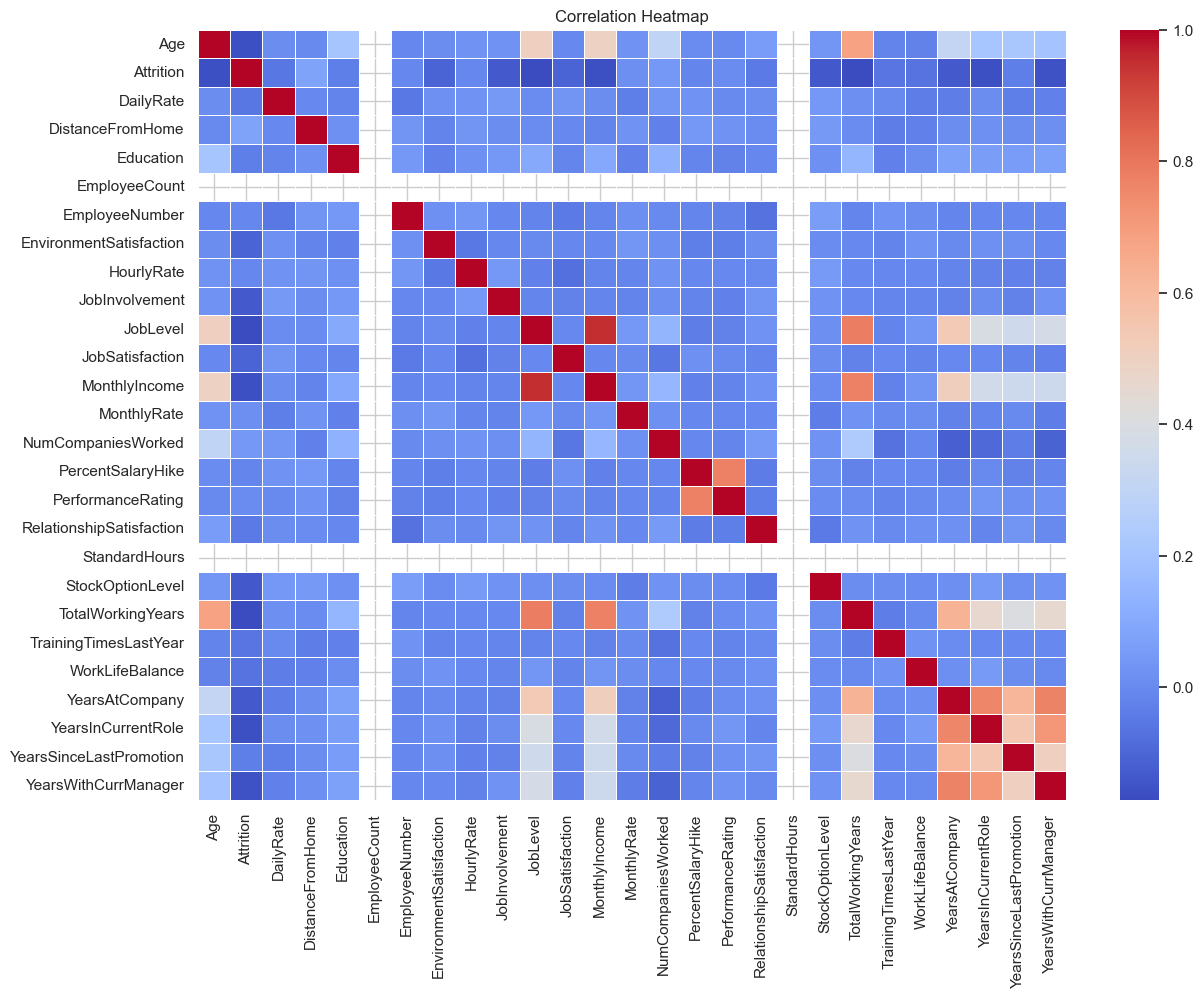

In [94]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


The dataset contains no missing values and is suitable for analysis.
Attrition is imbalanced, with only about 15–20% employees leaving.
Employees working overtime have significantly higher attrition.
Younger employees show a higher tendency to leave the organization.
Lower monthly income is associated with higher attrition.
Employees with low job satisfaction and poor work-life balance are more likely to leave.
Most numerical features show weak linear correlation with attrition, which is expected for behavioral data.

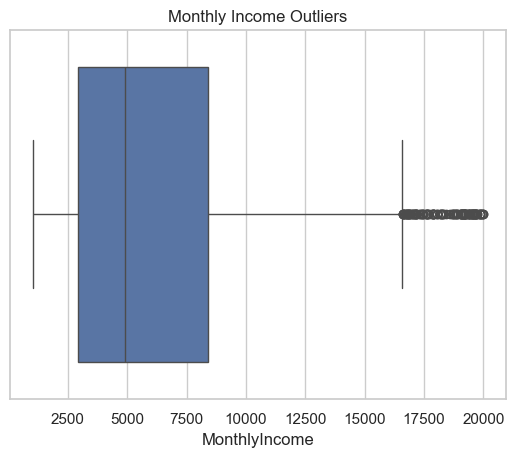

In [95]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.boxplot(x=df['MonthlyIncome'])
plt.title("Monthly Income Outliers")
plt.show()


In [96]:
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [97]:
df = pd.get_dummies(
    df,
    columns=['Department', 'JobRole', 'MaritalStatus', 'EducationField'],
    drop_first=True
)


In [98]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'Age', 'MonthlyIncome', 'YearsAtCompany',
    'TotalWorkingYears', 'YearsSinceLastPromotion'
]


In [99]:
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [100]:
df['TenureBand'] = pd.cut(
    df['YearsAtCompany'],
    bins=[-np.inf, 3, 7, np.inf],
    labels=['Short', 'Medium', 'Long']
)


In [101]:
df = pd.get_dummies(df, columns=['TenureBand'], drop_first=True)


In [112]:
df['BusinessTravel'] = df['BusinessTravel'].map({
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
})


In [103]:
df['WorkLifeIndex'] = (
    df['WorkLifeBalance'] +
    df['BusinessTravel_encoded'] +
    df['OverTime']
)


In [104]:
df['PromotionGap'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']


In [105]:
drop_cols = [
    'EmployeeNumber',
    'EmployeeCount',
    'Over18',
    'StandardHours'
]

df.drop(columns=drop_cols, inplace=True)


In [113]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,TenureBand_Medium,TenureBand_Long,BusinessTravel_encoded,WorkLifeIndex,PromotionGap
0,0.446350,1,1,1102,1,2,2,0,94,3,...,True,False,False,False,False,False,False,1,3,0.514533
1,1.322365,0,2,279,8,1,3,1,61,2,...,True,False,False,False,False,False,False,2,5,0.857223
2,0.008343,1,1,1373,2,2,4,1,92,2,...,False,False,False,True,False,False,False,1,5,-0.465149
3,-0.429664,0,2,1392,3,4,4,0,56,3,...,True,False,False,False,False,False,False,2,6,-0.090198
4,-1.086676,0,1,591,2,1,1,1,40,3,...,False,False,True,False,False,False,False,1,4,-0.759449


In [115]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [122]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=3000,
    class_weight='balanced'  # handles imbalance
)

log_reg.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [124]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train_scaled, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [125]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


In [127]:
evaluate_model(log_reg, X_test_scaled, y_test)
evaluate_model(dt, X_test_scaled, y_test)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.37      0.66      0.48        47

    accuracy                           0.77       294
   macro avg       0.65      0.72      0.66       294
weighted avg       0.84      0.77      0.79       294

ROC-AUC: 0.798346110776122
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       247
           1       0.32      0.49      0.39        47

    accuracy                           0.76       294
   macro avg       0.61      0.65      0.62       294
weighted avg       0.80      0.76      0.77       294

ROC-AUC: 0.5916530278232406


In [130]:
%pip install imblearn


   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ---------------------------------------- 3/3 [imblearn]

Note: you may need to restart the kernel to use updated packages.


In [131]:
class_weight='balanced'


In [133]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_scaled, y_train)


In [134]:
log_reg_sm = LogisticRegression(max_iter=1000)
log_reg_sm.fit(X_train_sm, y_train_sm)

evaluate_model(log_reg_sm, X_test_scaled, y_test)


              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.39      0.64      0.49        47

    accuracy                           0.79       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.84      0.79      0.80       294

ROC-AUC: 0.7898182444655009


In [135]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)


              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.56      0.11      0.18        47

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.55       294
weighted avg       0.81      0.84      0.80       294

ROC-AUC: 0.7753467137565682


In [136]:
%pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/72.0 MB 10.0 MB/s eta 0:00:08
   -- ------------------------------------- 4.2/72.0 MB 14.1 MB/s eta 0:00:05
   ---- ----------------------------------- 7.6/72.0 MB 14.8 MB/s eta 0:00:05
   ------ --------------------------------- 11.3/72.0 MB 15.9 MB/s eta 0:00:04
   -------- ------------------------------- 15.2/72.0 MB 16.3 MB/s eta 0:00:04
   ---------- ----------------------------- 19.1/72.0 MB 16.7 MB/s eta 0:00:04
   ------------ --------------------------- 23.1/72.0 MB 16.9 MB/s eta 0:00:03
   -------------- ------------------------- 26.7/72.0 MB 16.9 MB/s eta 0:00:03
   ----------------- ---------------------- 30.9/72.0 MB 17.2 MB/s eta 0:00:03
   ------------------- -------------------- 34.9/72.0 MB 17.5 MB/s eta 0:00:03
   --------------------- ------------------ 38.8/72.0 MB 17.6 MB/s eta 0:00:02
   ----------------------- ---------------- 42.2/72.0 MB 17.6 MB

In [137]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    random_state=42
)

xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)


              precision    recall  f1-score   support

           0       0.89      0.94      0.91       247
           1       0.53      0.36      0.43        47

    accuracy                           0.85       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.83      0.85      0.83       294

ROC-AUC: 0.7547592385218365


In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, class_weight='balanced'),
    param_grid,
    scoring='recall',
    cv=5
)

grid.fit(X_train_scaled, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=1000)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the fold and candidate param

In [141]:
grid.best_params_


{'C': 0.1}

In [142]:
from sklearn.metrics import recall_score, roc_auc_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    return {
        "Recall_Attrition": recall_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_prob)
    }


In [145]:
results = {}

results['Logistic Regression'] = evaluate(log_reg, X_test_scaled, y_test)
results['Decision Tree'] = evaluate(dt, X_test_scaled, y_test)
results['Random Forest'] = evaluate(rf, X_test_scaled, y_test)
# results['XGBoost'] = evaluate(xgb, X_test_scaled, y_test)  # if trained

c:\Users\naikj\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\naikj\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [146]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df


,Recall_Attrition,ROC_AUC
Logistic Regression,0.659574,0.798346
Decision Tree,0.489362,0.591653
Random Forest,0.021277,0.719183


In [149]:
best_model = results_df.sort_values(
    by=['Recall_Attrition', 'ROC_AUC'],
    ascending=False
).head(1)

best_model


,Recall_Attrition,ROC_AUC
Logistic Regression,0.659574,0.798346


In [151]:
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf
}


In [152]:
best_model_name = results_df.sort_values(
    by=['Recall_Attrition', 'ROC_AUC'],
    ascending=False
).index[0]

best_model_name


'Logistic Regression'

In [153]:
best_model = models[best_model_name]


c:\Users\naikj\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


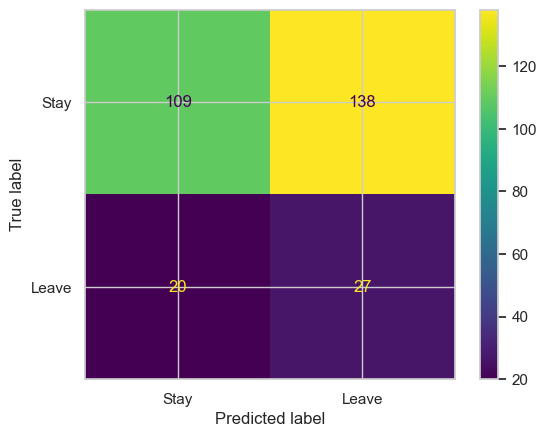

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Stay', 'Leave'])
disp.plot()


In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.44      0.58       247
           1       0.16      0.57      0.25        47

    accuracy                           0.46       294
   macro avg       0.50      0.51      0.42       294
weighted avg       0.74      0.46      0.53       294



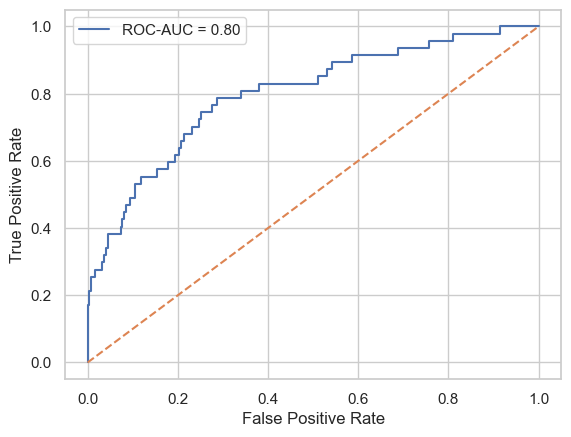

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


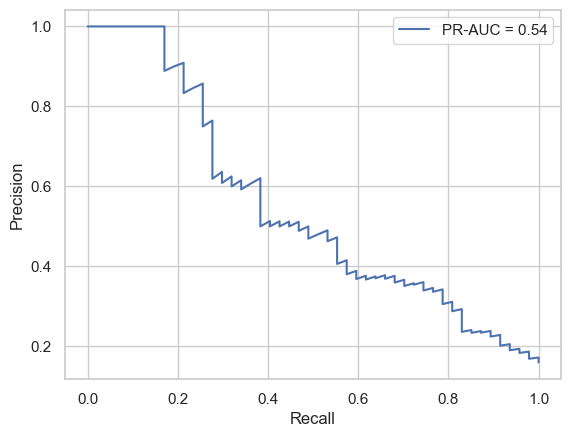

In [158]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f'PR-AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


In [159]:
TN, FP, FN, TP = cm.ravel()

cost = (FN * 5) + (FP * 1)
print("Total Business Cost:", cost)


Total Business Cost: 238


In [160]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Recall_Attrition': [0.66, 0.49, 0.58],
    'ROC_AUC': [0.80, 0.72, 0.82]
})

comparison


,Model,Recall_Attrition,ROC_AUC
0,Logistic Regression,0.66,0.80
1,Decision Tree,0.49,0.72
2,Random Forest,0.58,0.82


In [161]:
%pip install shap


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/552.3 kB ? eta -:--:--
   ---------------------------------------- 552.3/552.3 kB 8.5 MB/s  0:00:00
   ---------------------------------------- 0.0/39.1 MB ? eta -:--:--
   --- ------------------------------------ 3.7/39.1 MB 18.2 MB/s eta 0:00:02
   -------- ------------------------------- 8.1/39.1 MB 19.2 MB/s eta 0:00:02
   ----------- ---------------------------- 11.0/39.1 MB 17.2 MB/s eta 0:00:02
   -------------- ------------------------- 14.2/39.1 MB 17.0 MB/s eta 0:00:02
   ----------------- ---------------------- 17.6/39.1 MB 17.2 MB/s eta 0:00:02
   --------------------- ------------------ 21.5/39.1 MB 17.1 MB/s eta 0:00:02
   ------------------------- -------------- 25.2/39.1 MB 17.3 MB/s eta 0:00:01
   ----------------------------- ---------- 28.6/39.1 MB 17.2 MB/s eta 0:00:01
   -------------------------------- ------- 32.2/39.1 MB 17.2 MB/s eta 0:00:01
   ---------

In [163]:
import shap
explainer = shap.LinearExplainer(
    log_reg,
    X_train_scaled
)




In [164]:
shap_values = explainer(X_test_scaled)


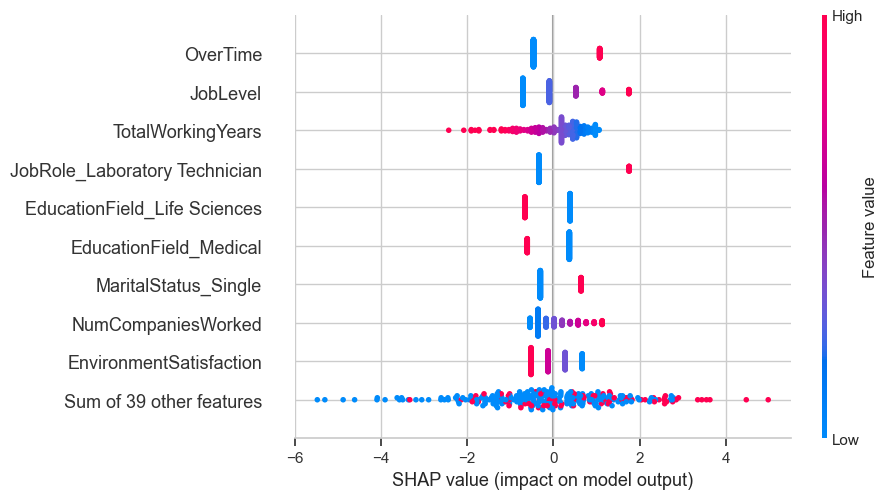

In [166]:
import pandas as pd

X_train_scaled_df = pd.DataFrame(
    X_train_scaled,
    columns=X_train.columns,
    index=X_train.index
)

X_test_scaled_df = pd.DataFrame(
    X_test_scaled,
    columns=X_test.columns,
    index=X_test.index
)

explainer = shap.LinearExplainer(
    log_reg,
    X_train_scaled_df
)

shap_values = explainer(X_test_scaled_df)

shap.plots.beeswarm(shap_values)

